# Học Máy (Machine Learning)

In [ ]:
Dựa trên dữ liệu lịch sử(historical data) nhằm giải quyết các bài toán cụ thể
Các dạng bài toán cơ bản mà Machine Learning hoạt động tốt: 

    1. Bài toán dự báo (Prediction)  (Thường Output là những con số)
       VD: dự báo ngày mai nhiệt độ là bao nhiêu
    
    2. Bài toán phân lớp (Classification)  (Thường Output là những giá trị định tính)
       VD: dự báo ngày mai trời nắng hay mưa
    
    3. Bài toán gom cụm (Clustering) 
    4. Bài toán luật kết hợp (Association Rule)
    
Có 3 kỹ thuật chính:
    - Học có giám sát (Supervised)        : Nếu tập dữ liệu Input và Output có sẵn trong Historical Data
    - Học không giám sát (Un-Supervised)  : Khi có tập dữ liệu Input nhưng không có Output 
    - Học bán giám sát (Senin-Supervised) : Khi có tập dữ liệu Input và cả Output nhưng không đầy đủ

In [ ]:
Giải Quyết Bài Toán Machine Learning
1. Xác định bài toán
2. Dữ liệu ( Historical Data )
3. Xử lý dữ liệu
4. Input --> Model --> Output ( Từ Input đến Model dùng Machine Learning, và phải đánh giá mô hình xem nó có tốt không)
   Thực tế:  
                                 (80%)     
                               - train  --> Model
Input: (100%):Cross Valiation                         Validation     --> Deployment --> FeedBack 
                               - test   --> Model
                                 (20%)

In [5]:
# Dẫn nhập hồi quy tuyến tính

#Ứng dụng trong bài toán Prediction
# Bài toán 1:  Hãy dự báo điểm T6 dựa trên T5
# Input: T5
# Output: T6
# Model là hồi quy tuyến tính: T6 = A0 + A1*T5 + epsilon
# Dùng học máy để đi tìm A0 và A1 dựa trên dữ liệu nhập lịch sử 

#             Giám sát
# Input:T5 --> Model ? --> Output: T6
                | |
                 V 
    # T6 = A0 + A1*T5 + epsilon (mô hình tổng quát, mô tả)

        (# LN, ANN tự tìm hiểu)
# Kỹ thuật học máy nào được áp dụng : Giám sát (Supervised)
#Import Thu Vien
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

#Tai Du Lieu Len Data Frame, dat ten la df
df = pd.read_csv('dulieuxettuyendaihoc.csv',header = 0, delimiter = ',', encoding = 'utf-8')

In [6]:
#Hien thi 10 dong dau tien trong df
df.head(10)

,MSSV,T1,T2,T3,T4,T5,T6,GT,DT,KV,NGONNGU,TOANLOGICPHANTICH,GIAIQUYETVANDE,KT,NGAYTHI,DINHHUONGNGHENGHIEP
0,SV001,7.2,8.4,7.4,7.2,7.4,6.9,F,NaN,2NT,3.25,3.25,4.50,A1,12/7/2018,No
1,SV002,5.4,6.3,4.3,4.9,3.0,4.0,M,NaN,1,6.00,4.00,3.50,C,12/7/2018,Yes
2,SV003,5.6,5.0,2.8,6.1,4.8,5.7,M,NaN,1,5.00,6.75,4.00,C,12/7/2018,No
3,SV004,6.6,5.1,5.9,4.1,6.1,7.4,M,NaN,1,4.25,4.25,5.25,D1,12/7/2018,No
4,SV005,6.0,5.4,7.6,4.4,6.8,8.0,M,NaN,2NT,4.25,4.50,5.00,A,12/7/2018,No
5,SV006,9.3,9.6,7.1,8.5,8.5,7.8,M,NaN,1,1.50,4.00,6.00,D1,12/7/2018,No
6,SV007,2.8,4.4,4.6,4.7,5.4,5.3,F,NaN,2,6.50,6.75,5.25,C,12/7/2018,Yes
7,SV008,8.3,6.7,8.6,8.3,8.5,8.3,F,NaN,2,3.75,4.50,4.25,D1,12/7/2018,Yes
8,SV009,6.5,7.3,6.4,8.1,7.7,7.7,F,NaN,1,3.50,3.50,6.75,D1,12/7/2018,Yes
9,SV0010,7.3,8.0,6.5,5.5,7.5,6.9,F,NaN,1,4.00,4.75,5.50,D1,12/7/2018,Yes


In [7]:
df = df[['T5','T6','NGONNGU']]

In [8]:
df[['T5','T6','NGONNGU']].head(5)

,T5,T6,NGONNGU
0,7.4,6.9,3.25
1,3.0,4.0,6.00
2,4.8,5.7,5.00
3,6.1,7.4,4.25
4,6.8,8.0,4.25


In [9]:
df[['T5','T6']].corr()
# Do mối tương quan giữa T5 và T6 là tương quan thuận nên có thể áp dụng Hồi qui tuyến tính

,T5,T6
T5,1.000000,0.778683
T6,0.778683,1.000000


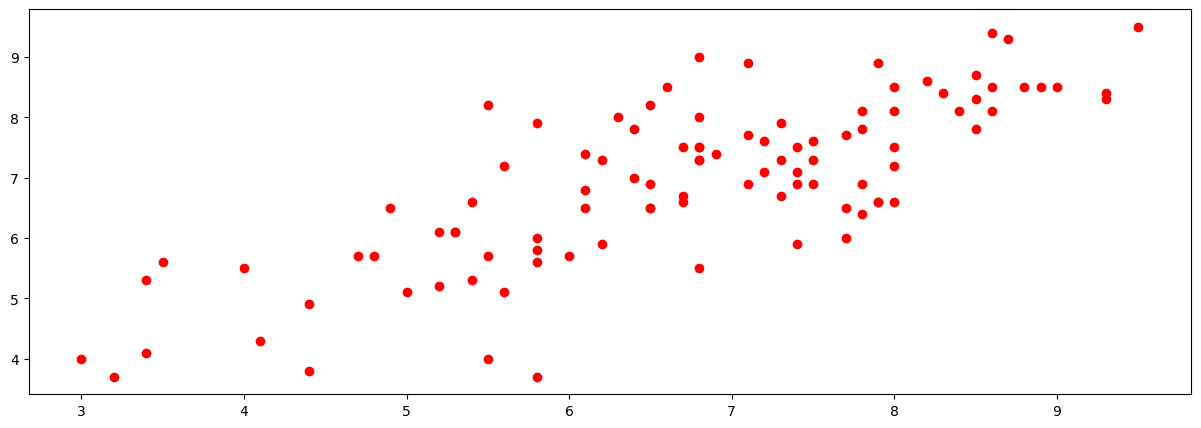

In [10]:
plt.figure(figsize=(15,5))
plt.plot(df['T5'],df['T6'],'ro')
plt.show()
# Dưới đây là biểu đồ cho tương quan thuận
# Về tìm hiểu biểu đồ nào là cho tương quan nghịch,không tương quan 

In [13]:
#Tập dữ liệu
X = df[['T5']].values #Input
y = df[['T6']].values #Output

#Chia tách ra trainning ( huấn luyện ) và testing (kiểm thử)
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,
                                                 random_state=16 ) #Lưu ý random_state phải cùng với số của thầy cho
#Xây dựng mô hình hồi quy tuyến tính đơn biến: T6=F(T5)
#T6 = A0 + A1*T5 + epsilon
from sklearn import linear_model

model = linear_model.LinearRegression()
model.fit(X_train,y_train)

#Sinh viên xác định các giá trị này tương ứng với gì 
#To retrieve the intercept:
print(model.intercept_)

#For retrieving the slope(Coefficient):
print(model.coef_)



#T6 = 2.15 + 0.71 * T5 + Epsilon

#phần dư (residucl) là khoảng lệch giữa giá trị thực tế(Actual) và giá trị dự báo (prediction)
# residucl giá trị càng nhỏ thì giá trị dự báo càng chính xác ( nếu residucl 0 thì ta dự báo chính xác 100%)
# Hình mô tả trong điện thoại 24/9


[2.15188873]
[[0.71126425]]


In [16]:
pd.DataFrame(X_test).to_csv("input_test.csv")
pd.DataFrame(y_test).to_csv("output_test.csv")

In [19]:
#Tính toán các MAE,MSE,RMSE trên các tập training và test để đánh giá mô hìhf 

import numpy as np
from sklearn import metrics

#Tinh gia tri du bao T6 dua tren du lieu T5 cua tap Test
y_test_pred = model.predict(X_test)

print('Score or R-Squared:',model.score(X_test,y_test))

print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,y_test_pred))

print('Mean Squared Error:',metrics.mean_squared_error(y_test,y_test_pred))

print('Root Mean Squared Error:',np.sqrt(metrics.mean_squared_error(y_test,y_test_pred)))

print('Mean Absolute Percentage Error:',metrics.mean_absolute_percentage_error(y_test,y_test_pred))



Score or R-Squared: 0.5248614005875201
Mean Absolute Error: 0.7348517098271248
Mean Squared Error: 0.9633910241687446
Root Mean Squared Error: 0.9815248464347424
Mean Absolute Percentage Error: 0.12159503916120853


In [20]:
#lưu trữ mô hình huấn luyện xuống ổ đĩa

import pickle
pickle.dump(model,open('model_linear_regression.sav','wb'))

In [22]:
import pickle
loaded_model = pickle.load(open('model_linear_regression.sav','rb'))

vT5= float(input('Nhap T5:'))

predicted_T6 = loaded_model.predict([[vT5]])
print(f'Du bao diem T6 la:{predicted_T6}')

Nhap T5:5.8
Du bao diem T6 la:[[6.27722137]]
